In [ ]:
# Importar e instalar dependencias

import pandas as pd
import numpy as np


# CARGA DE DATOS

In [ ]:
!pip install gdown
# Descarga el archivo del dataset de drive usando gdown
url = 'https://drive.google.com/file/d/1LkEJ3rstkdyhUGWi9O2YKQMe0wC_ZyDd/view?usp=sharing'
file_id = url.split('/')[-2]
!gdown --id $file_id

# Carga el dataset usando pandas
sd = pd.read_csv('/content/Suicide_Detection.csv')

# Muestra las primeras filas del dataset
sd.head()

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1LkEJ3rstkdyhUGWi9O2YKQMe0wC_ZyDd
From (redirected): https://drive.google.com/uc?id=1LkEJ3rstkdyhUGWi9O2YKQMe0wC_ZyDd&confirm=t&uuid=91856126-be3e-4580-a137-2b2ea41c5587
To: /content/Suicide_Detection.csv
100% 167M/167M [00:04<00:00, 36.3MB/s]


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


# INSPECCIÓN INICIAL

In [ ]:
# Información general del dataset
sd.info()

# Resumen estadístico de las variables numéricas
sd.describe()

# Conteo de valores faltantes por columna
sd.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


,0
Unnamed: 0,0
text,0
class,0


class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


<ipython-input-4-b4e657562730>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(sd,x='class', palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


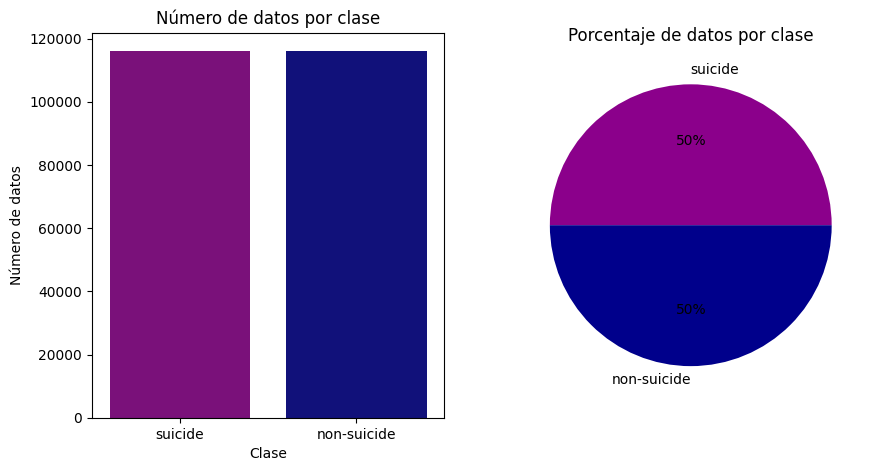

In [ ]:
# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Muestra el Número de datos por clase
classCnt = sd['class'].value_counts()
print(classCnt)

# Crea una figura y configura el tamaño del área del gráfico de barras (10 x 15 in)
plt.figure(figsize=((10,5)))

colors = ['#8B008B', '#00008B']

# Crea el gráfico de barras
plt.subplot(1,2,1)
sns.countplot(sd,x='class', palette=colors)
plt.title('Número de datos por clase')
plt.xlabel('Clase')
plt.ylabel('Número de datos')

# Crea el pie chart
plt.subplot(1,2,2)
plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%',colors=colors)
plt.title('Porcentaje de datos por clase')

# Muestra el gráfico
plt.show()

plt.show()

# LIMPIEZA Y ADECUACIÓN DE DATOS

In [ ]:
# Elimina la columna Unnamed: 0

if 'Unnamed: 0' in sd.columns:
    sd.drop('Unnamed: 0', axis=1, inplace=True)

# Muestra el número de datos duplicados

print(sd.duplicated().sum())
sd.head(10)

0


,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,Honetly idkI dont know what im even doing here...,suicide
6,[Trigger warning] Excuse for self inflicted bu...,suicide
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,My life is over at 20 years oldHello all. I am...,suicide


## Visualización de datos antes de la adecuación

Palabras más comunes en textos suicidas:
[('I', 1272790), ('to', 829295), ('and', 673470), ('the', 476843), ('a', 453667), ('my', 452052), ('of', 341806), ('that', 245625), ('me', 242272), ('in', 236396), ('have', 209556), ('it', 207164), ('for', 206351), ('is', 194926), ('just', 192839), ('but', 189103), ("I'm", 171474), ('was', 165278), ('i', 162075), ('with', 153935)]

Palabras más comunes en textos no suicidas:
[('I', 234200), ('to', 181914), ('and', 176662), ('the', 154299), ('a', 151588), ('my', 96585), ('of', 85946), ('you', 68390), ('in', 65000), ('is', 64002), ('that', 62736), ('it', 61896), ('me', 59016), ('for', 56378), ('i', 52711), ('but', 48847), ('just', 48314), ('have', 46212), ('\u200d', 45183), ('was', 43867)]


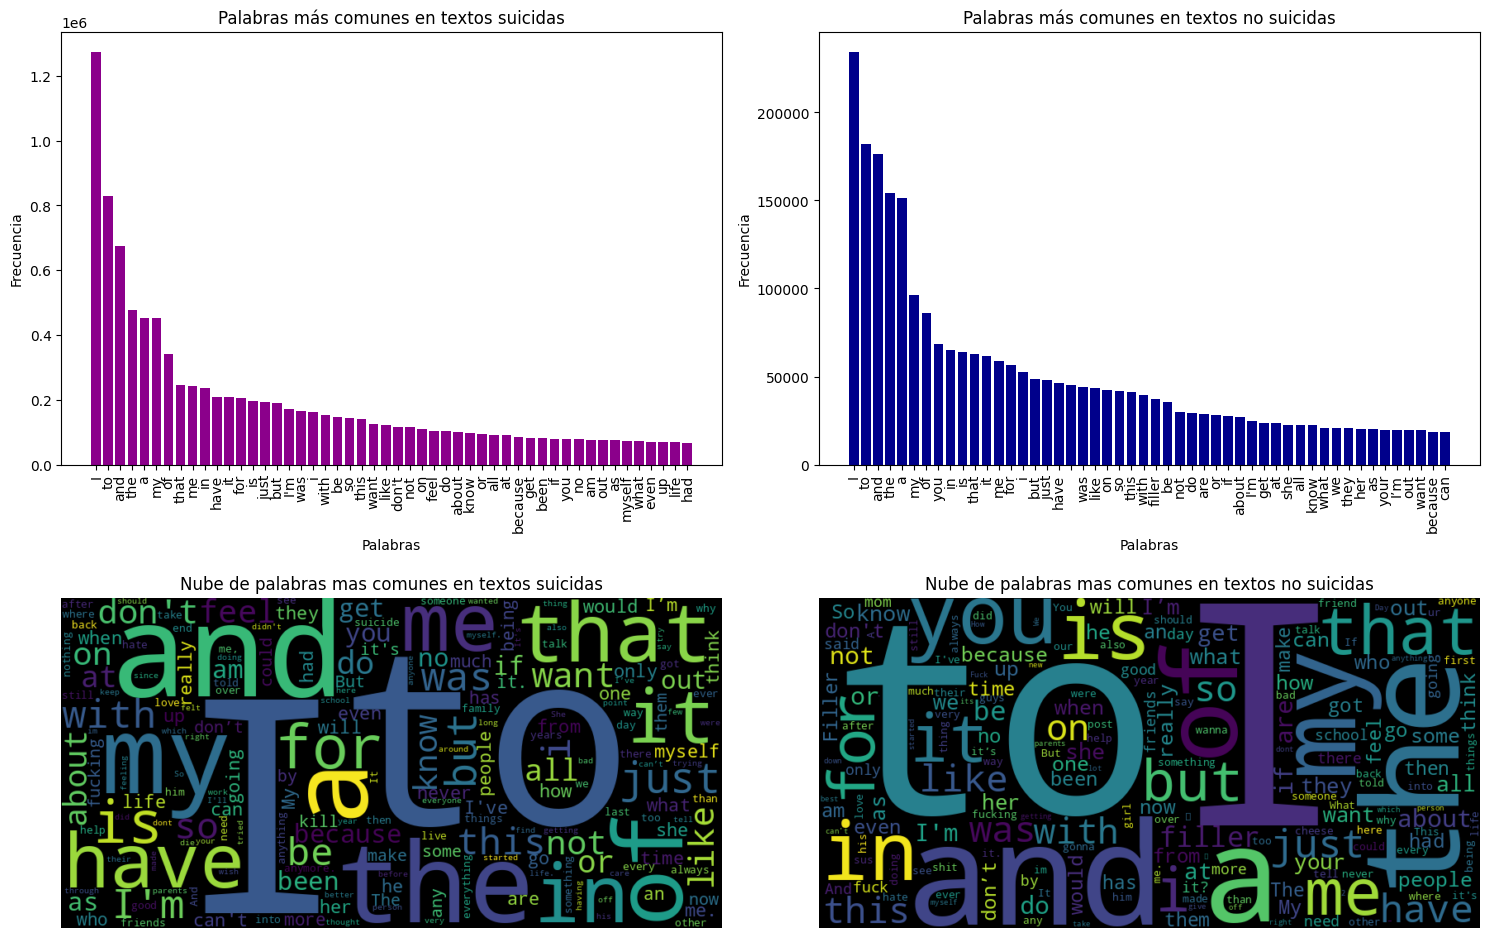

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter

# Combina todos los textos de cada clase
suicidal_texts = ' '.join(text for text in sd[sd['class'] == 'suicide']['text'])
non_suicidal_texts = ' '.join(text for text in sd[sd['class'] == 'non-suicide']['text'])

def analyze_word_frequencies(suicidal_texts, non_suicidal_texts):
    # Contador de palabras
    suicidal_word_freq = Counter(suicidal_texts.split())
    non_suicidal_word_freq = Counter(non_suicidal_texts.split())

    # Obtener las palabras más comunes
    suicidal_common_words = suicidal_word_freq.most_common(50)
    non_suicidal_common_words = non_suicidal_word_freq.most_common(50)

    # Muestra las palabras más comunes
    print("Palabras más comunes en textos suicidas:")
    print(suicidal_word_freq.most_common(20))

    print("\nPalabras más comunes en textos no suicidas:")
    print(non_suicidal_word_freq.most_common(20))

    # Graficar las palabras más comunes en textos suicidas
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.bar([word for word, freq in suicidal_common_words], [freq for word, freq in suicidal_common_words], color='#8B008B')
    plt.title('Palabras más comunes en textos suicidas')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)

    plt.subplot(2, 2, 2)
    plt.bar([word for word, freq in non_suicidal_common_words], [freq for word, freq in non_suicidal_common_words], color='#00008B')
    plt.title('Palabras más comunes en textos no suicidas')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)

    # Crear nubes de palabras más frecuentes
    suicidal_wordcloud = WordCloud(width=800, height=400, colormap='viridis', background_color='black').generate_from_frequencies(suicidal_word_freq)
    non_suicidal_wordcloud = WordCloud(width=800, height=400, colormap='viridis', background_color='black').generate_from_frequencies(non_suicidal_word_freq)

    # Mostrar nubes de palabras más frecuentes
    plt.subplot(2, 2, 3)
    plt.imshow(suicidal_wordcloud, interpolation='bilinear')
    plt.title('Nube de palabras mas comunes en textos suicidas')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(non_suicidal_wordcloud, interpolation='bilinear')
    plt.title('Nube de palabras mas comunes en textos no suicidas')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

analyze_word_frequencies(suicidal_texts, non_suicidal_texts)


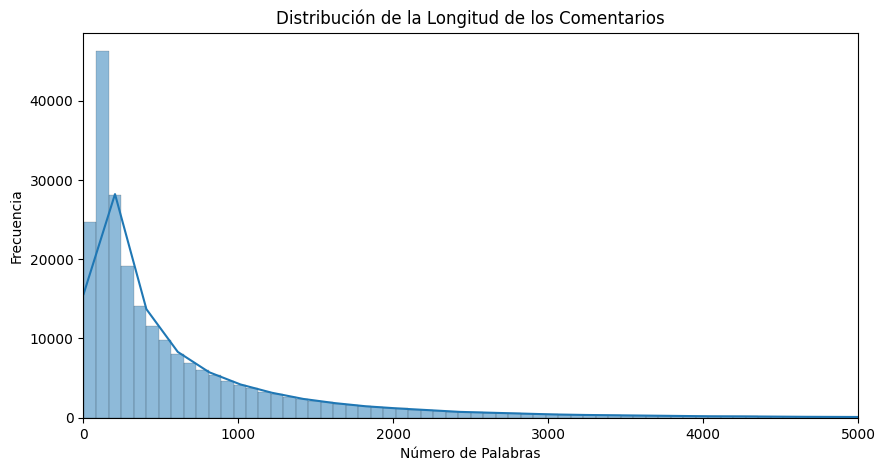

In [ ]:
# Calcula la longitud de cada lista de palabras
sd['text_length'] = sd['text'].apply(lambda x: len(x))

# Histograma de la longitud de los textos
plt.figure(figsize=(10, 5))
sns.histplot(sd['text_length'], bins=500, kde=True)
plt.title('Distribución de la Longitud de los Comentarios')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.xlim(0, 5000)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


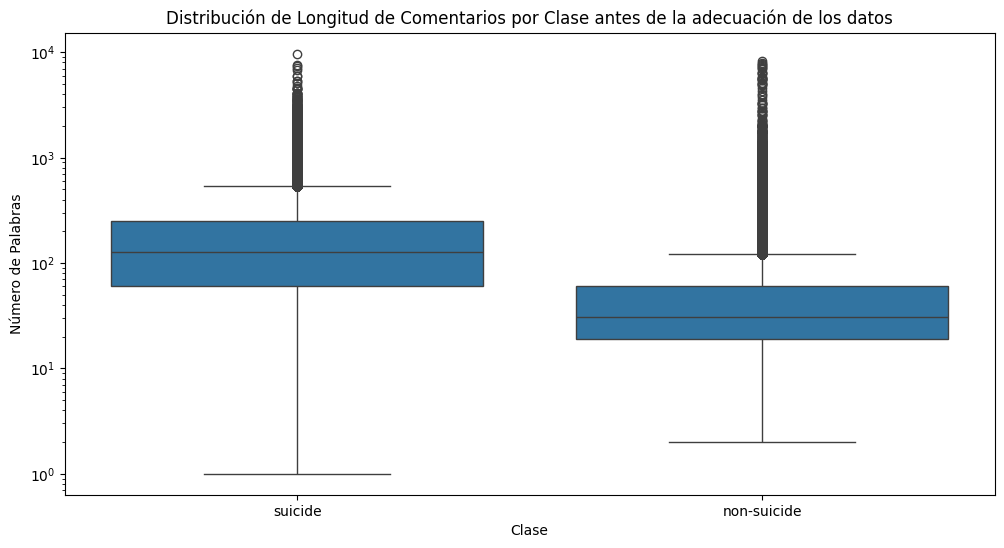

In [ ]:
# Calcula la longitud de cada comentario
sd['text_length'] = sd['text'].apply(lambda x: len(x.split()))

# Longitud de comentarios por clase
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='text_length', data=sd)

plt.yscale('log')
plt.title('Distribución de Longitud de Comentarios por Clase antes de la adecuación de los datos')
plt.xlabel('Clase')
plt.ylabel('Número de Palabras')
plt.show()

## Adecuación de datos

In [ ]:
import re

# Cambia las mayúsculas a minúsculas
sd['text']= sd['text'].str.lower()

# Reemplaza las abreviaciones por la expresión correspondiente expandida
abb = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "dont": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "idk": "i do not know",
  "he'd've": "he would have",
  "he'll": "he will",  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "im": "i am",
  "i've": "i have",
  "ive": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is", "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have", "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",      "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have", "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have", "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

abb_re = re.compile('(%s)' % '|'.join(abb.keys()))

def expandContractions(text, abb_re=abb_re):
    def replace(match):
        return abb[match.group(0)]
    return abb_re.sub(replace, text)

sd['text'] = sd['text'].apply(expandContractions)

In [ ]:
# Librerías de procesamiento de texto
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, words
from nltk.tokenize import word_tokenize
!pip install spacy
import spacy
!pip install neattext
import neattext as nfx
from tqdm import tqdm

# Cargar el modelo de spaCy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Inicializar palabras en inglés
english_words = set(words.words())

# Función para limpiar y procesar texto
def clean_text(texts):
    text_length = []
    cleaned_texts = []

    # Preprocesar textos antes de usar spaCy
    preprocessed_texts = [nfx.remove_stopwords(nfx.remove_special_characters(text.lower())) for text in texts]

    # Usar nlp.pipe para procesar textos en lotes
    for doc in tqdm(nlp.pipe(preprocessed_texts, batch_size=50)):
        # Lematizar y limpiar tokens (eliminar palabras que no están en inglés, excepto 'fuck')
        cleaned_tokens = [token.lemma_ if token.lemma_ != 'fuck' else token.text for token in doc if token.is_alpha and len(token) > 2 and (token.lemma_ in english_words or token.text == 'fuck')]

        # Remover URLs, correos, emojis y caracteres especiales
        cleaned_tokens = [re.sub(r'http\S+|\S+@\S+|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FE00-\U0001FE0F\U0001F004]+', '', token) for token in cleaned_tokens]
        cleaned_tokens = [re.sub(r'[^a-zA-Z\s]', '', token).strip() for token in cleaned_tokens]
        cleaned_tokens = [token for token in cleaned_tokens if len(token) > 2]

        # Guardar el texto limpio y su longitud
        cleaned_texts.append(' '.join(cleaned_tokens))
        text_length.append(len(cleaned_tokens))

    return cleaned_texts, text_length

# Aplicar la función a la columna 'text'
sd['cleaned_text'], sd['text_length'] = clean_text(sd['text'])

sd.head(10)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.2 MB/s eta 0:00:00


232074it [13:47, 280.34it/s]


,text,class,text_length,cleaned_text
0,ex wife threatening suiciderecently i left my ...,suicide,48,wife threaten leave wife good cheat twice lie ...
1,am i weird i do not get affected by compli ame...,non-suicide,8,weird affect ament come know feel good stranger
2,finally 2020 is almost over... so i can never ...,non-suicide,7,finally hear bad year swear god annoying
3,i need helpjust help me i am crying so hard,suicide,4,need help cry hard
4,"i’m so losthello, my name is adam (16) and i’v...",suicide,153,struggle year afraid past year thought suicide...
5,honetly i do not knowi do not know what i am e...,suicide,84,know feel like feel unbearably sad ignore frie...
6,[trigger warning] excuse for self inflicted bu...,suicide,77,trigger warn excuse self inflict know crisis l...
7,it ends tonight.i can’t do it anymore. \ni quit.,suicide,2,end quit
8,"everyone wants to be ""edgy"" and it is making m...",non-suicide,62,want edgy make self conscious feel like stand ...
9,my life is over at 20 years oldhello all. i am...,suicide,74,life year year old bald male hairline trash ma...


## Almacenamiento del dataset limpio como archivo .csv en drive

**Nota:** Se creó un .csv con el dataset limpio y procesado (Suicide_Detection_clean.csv) para trabajar de forma más práctica e independiente de la EDA en las siguientes etapas del proyecto

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Define la ruta donde quieres guardar el archivo en tu Google Drive
#file_path = '/content/drive/MyDrive/Suicide_Detection_clean.csv'

# Guarda el DataFrame en un archivo CSV en Google Drive
# sd.to_csv(file_path, index=False)

## Visualización de los datos luego de la adecuación

Palabras más comunes en textos suicidas:
[('want', 159473), ('feel', 152841), ('like', 134271), ('know', 128580), ('life', 108251), ('ame', 98680), ('think', 91823), ('year', 72765), ('people', 72015), ('try', 68572), ('get', 68413), ('friend', 68109), ('thing', 65250), ('day', 56413), ('tell', 55026), ('help', 53445), ('kill', 48861), ('good', 47663), ('end', 47193), ('die', 46219)]

Palabras más comunes en textos no suicidas:
[('filler', 53346), ('like', 53018), ('know', 33620), ('want', 27562), ('ame', 24646), ('get', 23828), ('people', 21881), ('feel', 21551), ('think', 21403), ('friend', 21003), ('fuck', 19166), ('day', 18621), ('good', 17175), ('say', 16758), ('talk', 16024), ('tell', 14937), ('school', 14470), ('guy', 14201), ('thing', 14089), ('girl', 13802)]


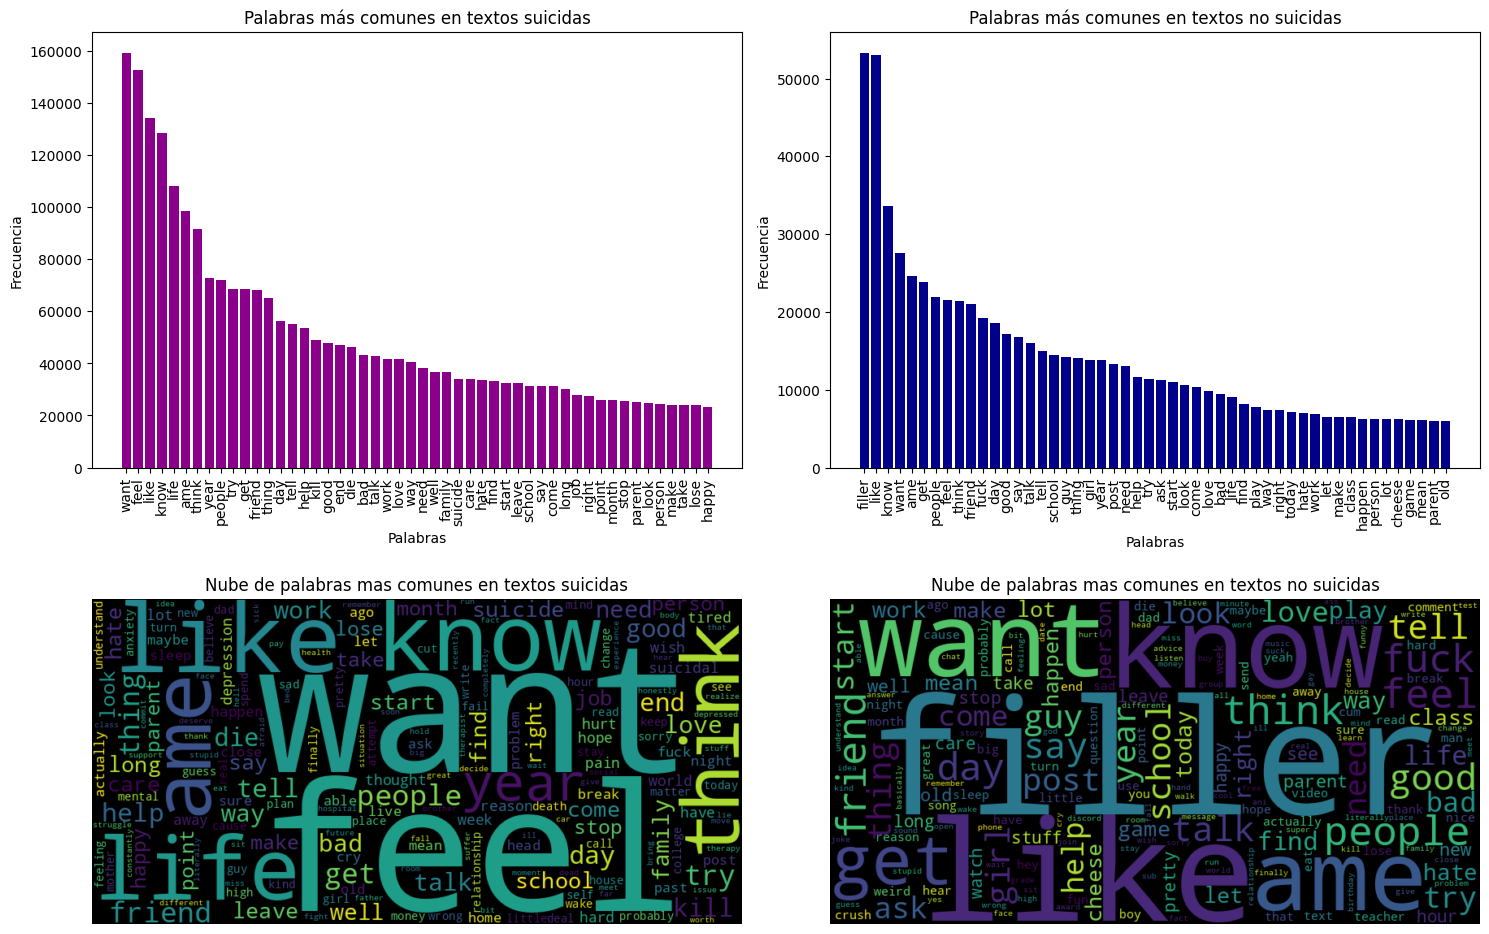

In [ ]:
# Combina todos los textos de cada clase
suicidal_texts = ' '.join(text for text in sd[sd['class'] == 'suicide']['cleaned_text'])
non_suicidal_texts = ' '.join(text for text in sd[sd['class'] == 'non-suicide']['cleaned_text'])

analyze_word_frequencies(suicidal_texts, non_suicidal_texts)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


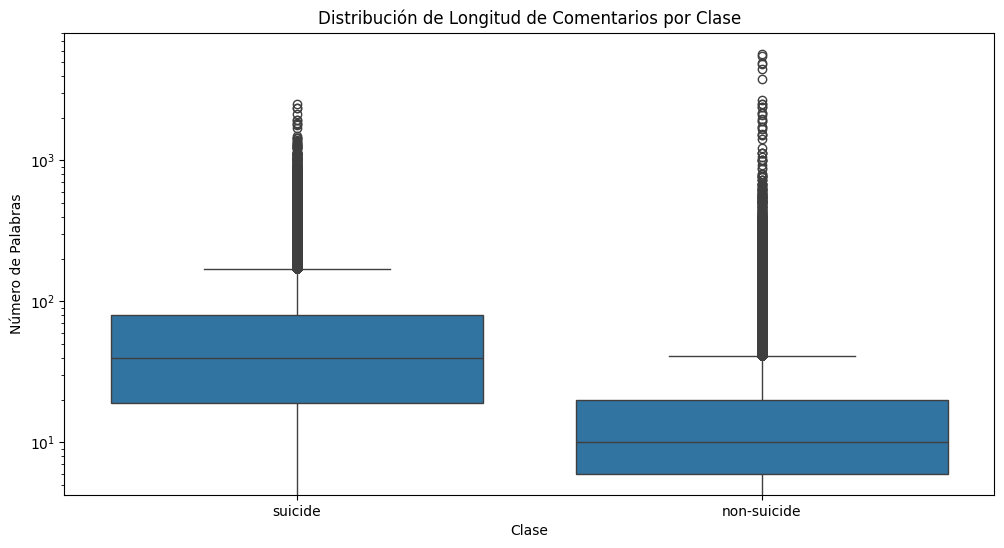

In [ ]:
# Calcula la longitud de cada comentario
sd['text_length'] = sd['cleaned_text'].apply(lambda x: len(x) if isinstance(x, list) else len(x.split()))

# Longitud de comentarios por clase
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='text_length', data=sd)

plt.yscale('log')
plt.title('Distribución de Longitud de Comentarios por Clase')
plt.xlabel('Clase')
plt.ylabel('Número de Palabras')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


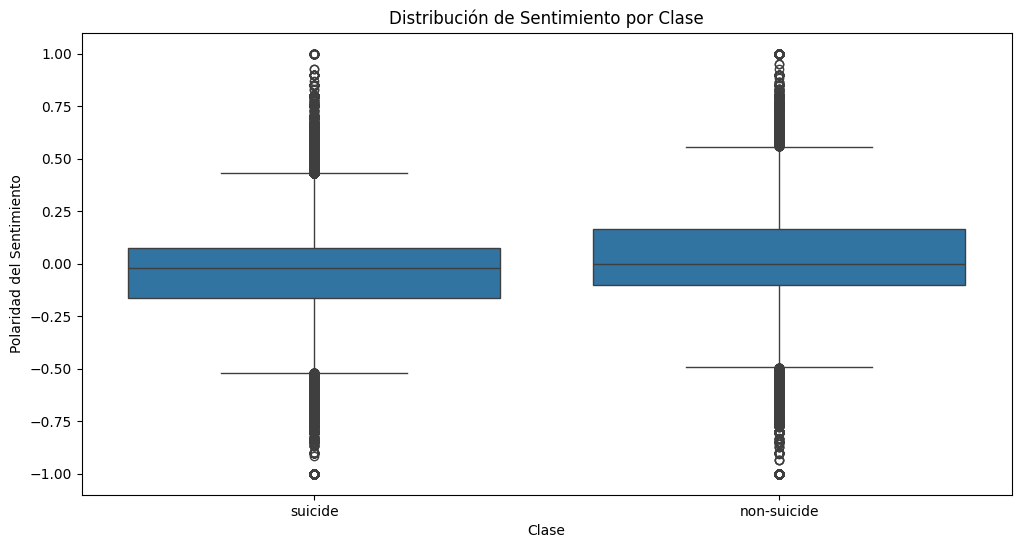

In [ ]:
from textblob import TextBlob

# Calcula el sentimiento de cada comentario
sd['sentiment'] = sd['cleaned_text'].apply(lambda x: TextBlob(" ".join(x)).sentiment.polarity if isinstance(x, list) else TextBlob(x).sentiment.polarity)

# Análisis de sentimiento por clase
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='sentiment', data=sd)
plt.title('Distribución de Sentimiento por Clase')
plt.xlabel('Clase')
plt.ylabel('Polaridad del Sentimiento')
plt.show()

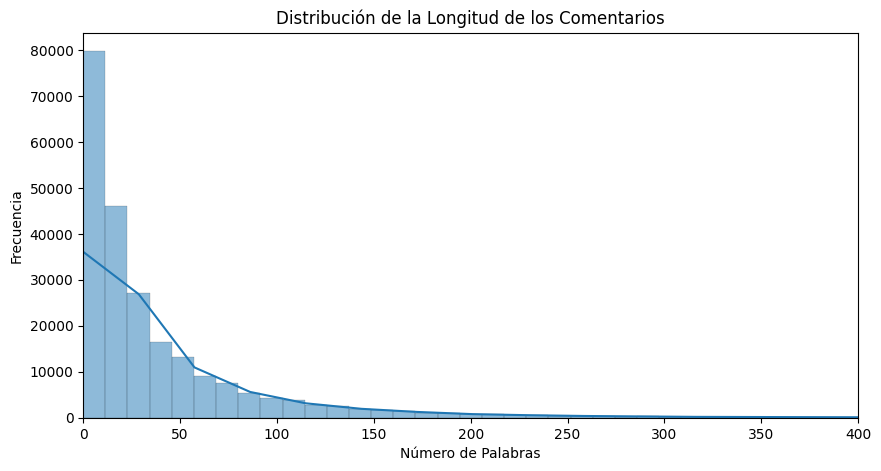

In [ ]:
# Calcula la longitud de cada lista de palabras
sd['text_length'] = sd['cleaned_text'].apply(lambda x: len(x.split()))

# Histograma de la longitud de los textos
plt.figure(figsize=(10, 5))
sns.histplot(sd['text_length'], bins=500, kde=True)
plt.title('Distribución de la Longitud de los Comentarios')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.xlim(0, 400)

plt.show()

# MODELADO Y ENTRENAMIENTO

In [ ]:
# Sampleo de data para agilizar el testeo del código
sd = sd.sample(n=30000, random_state=42)

In [ ]:
#Copia del dataset limpio (pre_processed)
pre_processed = sd.copy()
pre_processed.head(10)
print(pre_processed['cleaned_text'])

74414     month self harm free urge get strong strong da...
149516    start rich start company afford big van trip f...
12484                                   poem hello say know
14043     honestly get idea feel fake feel like annoying...
30673     cry like think unfair life cry cry sit serious...
                                ...                        
116716    good night hope sleep sweet dream let bed bug ...
92489     hate dude feel bad know literally year ago lik...
17703     feel today know what wrong feeling today know ...
73452     need attempt post history have submit article ...
120183                   guy get popcorn kernel gum day get
Name: cleaned_text, Length: 30000, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
# Separación de dataset en training y testing
train_data ,test_data = train_test_split(pre_processed,test_size=0.2,random_state=10)

print('Training data: ',len(train_data))
print('Testing data: ',len(test_data))


Training data:  24000
Testing data:  6000


## Extracción de Características

### Comparativa de Métodos de Extracción de Características

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
vectorizer_bow = CountVectorizer()
X_bow_train = vectorizer_bow.fit_transform(train_data['cleaned_text'])
X_bow_test = vectorizer_bow.transform(test_data['cleaned_text'])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf_train = vectorizer_tfidf.fit_transform(train_data['cleaned_text'])
X_tfidf_test = vectorizer_tfidf.transform(test_data['cleaned_text'])

# Comparación de características extraídas
print("Número de características en BoW:", X_bow_train.shape[1])
print("Número de características en TF-IDF:", X_tfidf_train.shape[1])

Número de características en BoW: 14825
Número de características en TF-IDF: 14825


### Visualización de características para cada texto - BoW


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

# Obteniendo nombres de las características (palabras) para BoW
feature_names_bow = vectorizer_bow.get_feature_names_out()

# Convertir una fila de la matriz BoW a DataFrame para una visualización más fácil
def bow_to_df(row_index):
    row = X_bow_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_bow, 'Frequency': row})
    return df[df['Frequency'] > 0]  # Filtrar por frecuencias mayores a cero

# Visualizar la conversión BoW de una revisión específica
example_bow = bow_to_df(0)  # Cambia 0 por otro índice si es necesario
print(train_data['cleaned_text'].iloc[0]) # This line prints the 'cleaned_text' for rows where the 'class' is 'suicide'
example_bow

severely mute speak stranger family know result receive attention dad look year life motor neurone father figure develop bad mutism speak family properly basic word phrase make feel like hell doctor mental health treatment pretty non existent diagnose care get brother sister attempt talk outcast pretty sure actually believe severe autism retarded way see speak friend stranger normal way kill inside that mum care extent recently try help talk like adult thank guess mean ame help understand anybody suggest write note block probably tenth cry help lose hope lose hope silent inside house scare talk family year count able conversation family member essentially like orphan bad opinion friend house family think family hearing talk normally kill ame mum insist friend round weekend horrible sure fun locked door play game attic eat table mum sit complete silence complete silence probably wonder fuck nope completely normal need help know know run ame know curable know late know life talk family b

,Word,Frequency
17,able,1
141,actually,1
201,adult,1
419,ame,4
582,anybody,1
...,...,...
14455,weekend,1
14644,wonder,1
14666,word,1
14731,write,1


### Visualización de características para cada texto - TFIDF

In [ ]:
# Obteniendo nombres de las características (palabras) para TF-IDF
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

# Convertir una fila de la matriz TF-IDF a DataFrame para una visualización más fácil
def tfidf_to_df(row_index):
    row = X_tfidf_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_tfidf, 'TF-IDF Value': row})
    return df[df['TF-IDF Value'] > 0]  # Filtrar por valores TF-IDF mayores a cero

# Visualizar la conversión TF-IDF de una revisión específica
example_tfidf = tfidf_to_df(0)  # Cambia 0 por otro índice si es necesario
print(train_data['cleaned_text'].iloc[0]) # Use .iloc to access the row by its position
example_tfidf

severely mute speak stranger family know result receive attention dad look year life motor neurone father figure develop bad mutism speak family properly basic word phrase make feel like hell doctor mental health treatment pretty non existent diagnose care get brother sister attempt talk outcast pretty sure actually believe severe autism retarded way see speak friend stranger normal way kill inside that mum care extent recently try help talk like adult thank guess mean ame help understand anybody suggest write note block probably tenth cry help lose hope lose hope silent inside house scare talk family year count able conversation family member essentially like orphan bad opinion friend house family think family hearing talk normally kill ame mum insist friend round weekend horrible sure fun locked door play game attic eat table mum sit complete silence complete silence probably wonder fuck nope completely normal need help know know run ame know curable know late know life talk family b

,Word,TF-IDF Value
17,able,0.048328
141,actually,0.045159
201,adult,0.068964
419,ame,0.115063
582,anybody,0.066960
...,...,...
14455,weekend,0.068260
14644,wonder,0.058591
14666,word,0.056452
14731,write,0.050455


### Visualización de distribución de palabras - BoW

<ipython-input-22-8ad7e207c08c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a leng

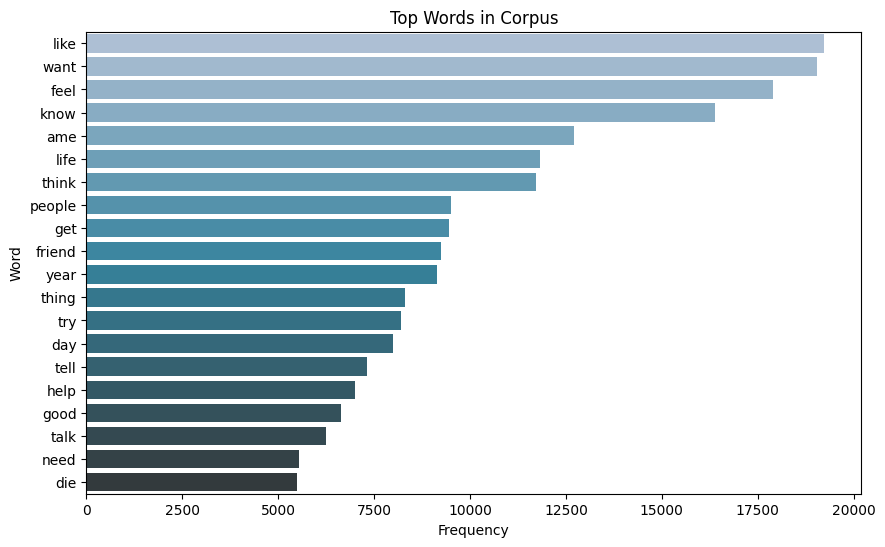

In [ ]:
def plot_top_words(vectorizer, feature_matrix, top_n=20):
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Ejemplo de uso con BoW
plot_top_words(vectorizer_bow, X_bow_train)

### Visualización de distribución de palabras - TF-IDF

<ipython-input-23-ead27b9659ca>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a leng

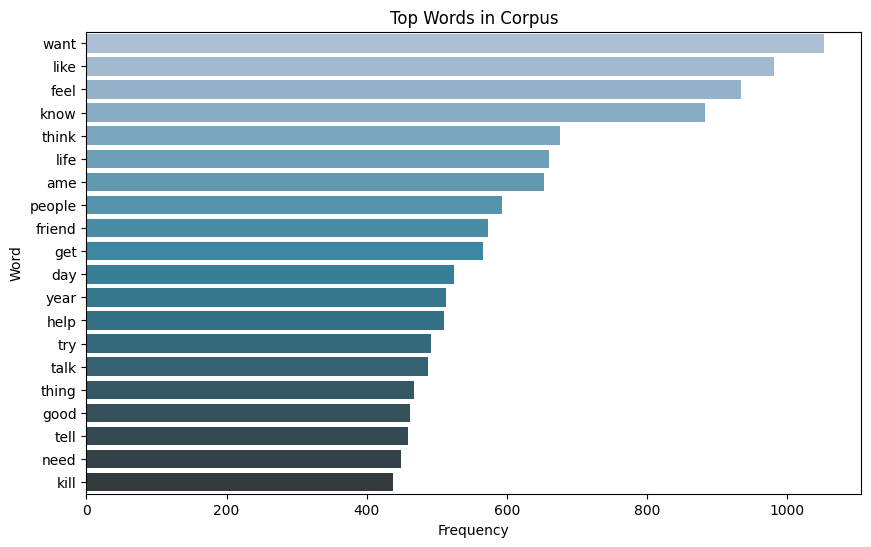

In [ ]:
def plot_top_words(vectorizer, feature_matrix, top_n=20):
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Ejemplo de uso con BoW
plot_top_words(vectorizer_bow, X_tfidf_train)

## Modelo de regresión logística basado en BoW

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Entrenamiento del modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_bow_train, train_data['class'])

# Evaluación del modelo
predictions_bow = model.predict(X_bow_test)
accuracy_bow = accuracy_score(test_data['class'], predictions_bow )
precision_bow = precision_score(test_data['class'], predictions_bow , average='weighted')
recall_bow = recall_score(test_data['class'], predictions_bow , average='weighted')
f1_bow = f1_score(test_data['class'], predictions_bow , average='weighted')
confusion_mat_bow = confusion_matrix(test_data['class'], predictions_bow)

print("Accuracy:", accuracy_bow)
print("Precision:", precision_bow)
print("Recall:", recall_bow)
print("F1-Score:", f1_bow)
print("Confusion Matrix:\n", confusion_mat_bow)

Accuracy: 0.9001666666666667
Precision: 0.900896769431733
Recall: 0.9001666666666667
F1-Score: 0.9001015811878567
Confusion Matrix:
 [[2790  234]
 [ 365 2611]]


## Modelo de regresión logística basado en TFIDF

In [ ]:
# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_tfidf_train, train_data['class'])

# Evaluación del modelo
predictions_tfidf = model.predict(X_tfidf_test)
accuracy_tfidf = accuracy_score(test_data['class'], predictions_tfidf)
precision_tfidf = precision_score(test_data['class'], predictions_tfidf, average='weighted')
recall_tfidf = recall_score(test_data['class'], predictions_tfidf, average='weighted')
f1_tfidf = f1_score(test_data['class'], predictions_tfidf, average='weighted')
confusion_mat_tfidf = confusion_matrix(test_data['class'], predictions_tfidf)

print("Accuracy:", accuracy_tfidf)
print("Precision:", precision_tfidf)
print("Recall:", recall_tfidf)
print("F1-Score:", f1_tfidf)
print("Confusion Matrix:\n", confusion_mat_tfidf)

Accuracy: 0.912
Precision: 0.912246852057842
Recall: 0.912
F1-Score: 0.91197695371223
Confusion Matrix:
 [[2798  226]
 [ 302 2674]]


## Modelo de embedding pre-entrenado GloVe

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

# Cargar embeddings preentrenados de GloVe
glove_vectors = api.load("glove-twitter-25")

# Función para obtener el vector promedio para una reseña
def document_vector(doc):
    # Quitar palabras que no están en el vocabulario de embeddings
    words = [word for word in doc.split() if word in glove_vectors.key_to_index]
    if len(words) >= 1:
        return np.mean(glove_vectors[words], axis=0)
    else:
        return np.zeros(glove_vectors.vector_size)

# Aplicar la función a las reseñas limpias
train_data['doc_vector'] = train_data['cleaned_text'].apply(document_vector)
test_data['doc_vector'] = test_data['cleaned_text'].apply(document_vector)

# Verificar que los vectores estén correctamente calculados
train_data.head()

[==================================================] 100.0% 104.8/104.8MB downloaded


,text,class,text_length,cleaned_text,sentiment,doc_vector
83367,"i am very severely selecti have mute, i can sp...",suicide,176,severely mute speak stranger family know resul...,-0.068683,"[-0.116031, 0.37937498, -0.11049508, 0.0663637..."
56419,un popular opinion cheese,non-suicide,3,popular opinion cheese,0.600000,"[0.18645664, 0.081969, -0.25606, 0.15020664, 0..."
231284,i am going to kill myself tonighti cannot take...,suicide,12,kill heart problem rest heart rate send home c...,0.358333,"[-0.24601334, 0.33169916, -0.2044525, 0.368602..."
73813,ay i got a free award who wants it first one t...,non-suicide,7,get free award want awful joke get,-0.300000,"[0.046833854, 0.58395714, -0.11444586, -0.5587..."
99056,are there any coders here?programming is the o...,suicide,21,coder thing stop suicidal tendency coder like ...,0.250000,"[-0.10135807, 0.53075504, -0.3486854, 0.027922..."


## Entrenamiento GloVe

In [ ]:
# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_data['doc_vector']))
X_test = np.array(list(test_data['doc_vector']))
y_train = train_data['class'].values
y_test = test_data['class'].values

# Entrenar un modelo de regresión logística con los vectores de GloVe
model_glove = LogisticRegression(max_iter=1000)
model_glove.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones y evaluación
predictions_glove = model_glove.predict(X_test)
accuracy_GloVe = accuracy_score(y_test, predictions_glove)
precision_GloVe = precision_score(y_test, predictions_glove, average='weighted')
recall_GloVe = recall_score(y_test, predictions_glove, average='weighted')
f1_GloVe = f1_score(y_test, predictions_glove, average='weighted')
conf_matrix_GloVe = confusion_matrix(y_test, predictions_glove)

# Imprimir los resultados
print("Accuracy:", accuracy_GloVe)
print("Precision:", precision_GloVe)
print("Recall:", recall_GloVe)
print("F1-Score:", f1_GloVe)
print("Confusion Matrix:\n", conf_matrix_GloVe)

Accuracy: 0.7996666666666666
Precision: 0.8027265114090802
Recall: 0.7996666666666666
F1-Score: 0.7992635193092923
Confusion Matrix:
 [[2276  748]
 [ 454 2522]]


## Modelo de embeddings preentrenado - Word2Vec

In [ ]:
# Entrenar modelo Word2Vec
sentences = [review.split() for review in train_data['cleaned_text']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)

# Función para convertir una reseña en un vector promedio usando nuestro modelo Word2Vec
def vectorize_review(review, model):
    words = [word for word in review.split() if word in model.wv.key_to_index]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0) #Promedio de todos los vectores (embedding de cada palabra)
    else:
        return np.zeros(model.vector_size)

train_data['word2vec_vector'] = train_data['cleaned_text'].apply(lambda x: vectorize_review(x, word2vec_model))
test_data['word2vec_vector'] = test_data['cleaned_text'].apply(lambda x: vectorize_review(x, word2vec_model))

# Verificar los vectores generados
train_data.head()

,text,class,text_length,cleaned_text,sentiment,doc_vector,word2vec_vector
83367,"i am very severely selecti have mute, i can sp...",suicide,176,severely mute speak stranger family know resul...,-0.068683,"[-0.116031, 0.37937498, -0.11049508, 0.0663637...","[0.048543926, 0.19827858, 0.146688, 0.07290847..."
56419,un popular opinion cheese,non-suicide,3,popular opinion cheese,0.600000,"[0.18645664, 0.081969, -0.25606, 0.15020664, 0...","[0.028347125, 0.13357532, 0.09939573, 0.182523..."
231284,i am going to kill myself tonighti cannot take...,suicide,12,kill heart problem rest heart rate send home c...,0.358333,"[-0.24601334, 0.33169916, -0.2044525, 0.368602...","[-0.05832191, 0.31975865, 0.19837005, 0.185026..."
73813,ay i got a free award who wants it first one t...,non-suicide,7,get free award want awful joke get,-0.300000,"[0.046833854, 0.58395714, -0.11444586, -0.5587...","[0.0030540398, 0.14934005, 0.21513939, 0.09223..."
99056,are there any coders here?programming is the o...,suicide,21,coder thing stop suicidal tendency coder like ...,0.250000,"[-0.10135807, 0.53075504, -0.3486854, 0.027922...","[0.012559466, 0.22079632, 0.13447, 0.09166887,..."


## Entrenamiento Word2Vec

In [ ]:
# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_data['word2vec_vector']))
X_test = np.array(list(test_data['word2vec_vector']))
y_train = train_data['class']
y_test = test_data['class']

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones y evaluación
predictions_Word2Vec = model.predict(X_test)
accuracy_word2Vec = accuracy_score(y_test, predictions_Word2Vec)
precision_word2Vec = precision_score(y_test, predictions_Word2Vec, average='weighted')
recall_word2Vec = recall_score(y_test, predictions_Word2Vec, average='weighted')
f1_word2Vec = f1_score(y_test, predictions_Word2Vec, average='weighted')
confusion_mat_word2Vec = confusion_matrix(y_test, predictions_Word2Vec)

# Imprimir los resultados
print("Accuracy:", accuracy_word2Vec)
print("Precision:", precision_word2Vec)
print("Recall:", recall_word2Vec)
print("F1-Score:", f1_word2Vec)
print("Confusion Matrix:\n", confusion_mat_word2Vec)

Accuracy: 0.8836666666666667
Precision: 0.8851712961312176
Recall: 0.8836666666666667
F1-Score: 0.8835857605062868
Confusion Matrix:
 [[2583  441]
 [ 257 2719]]


### t-SNE y UMAP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


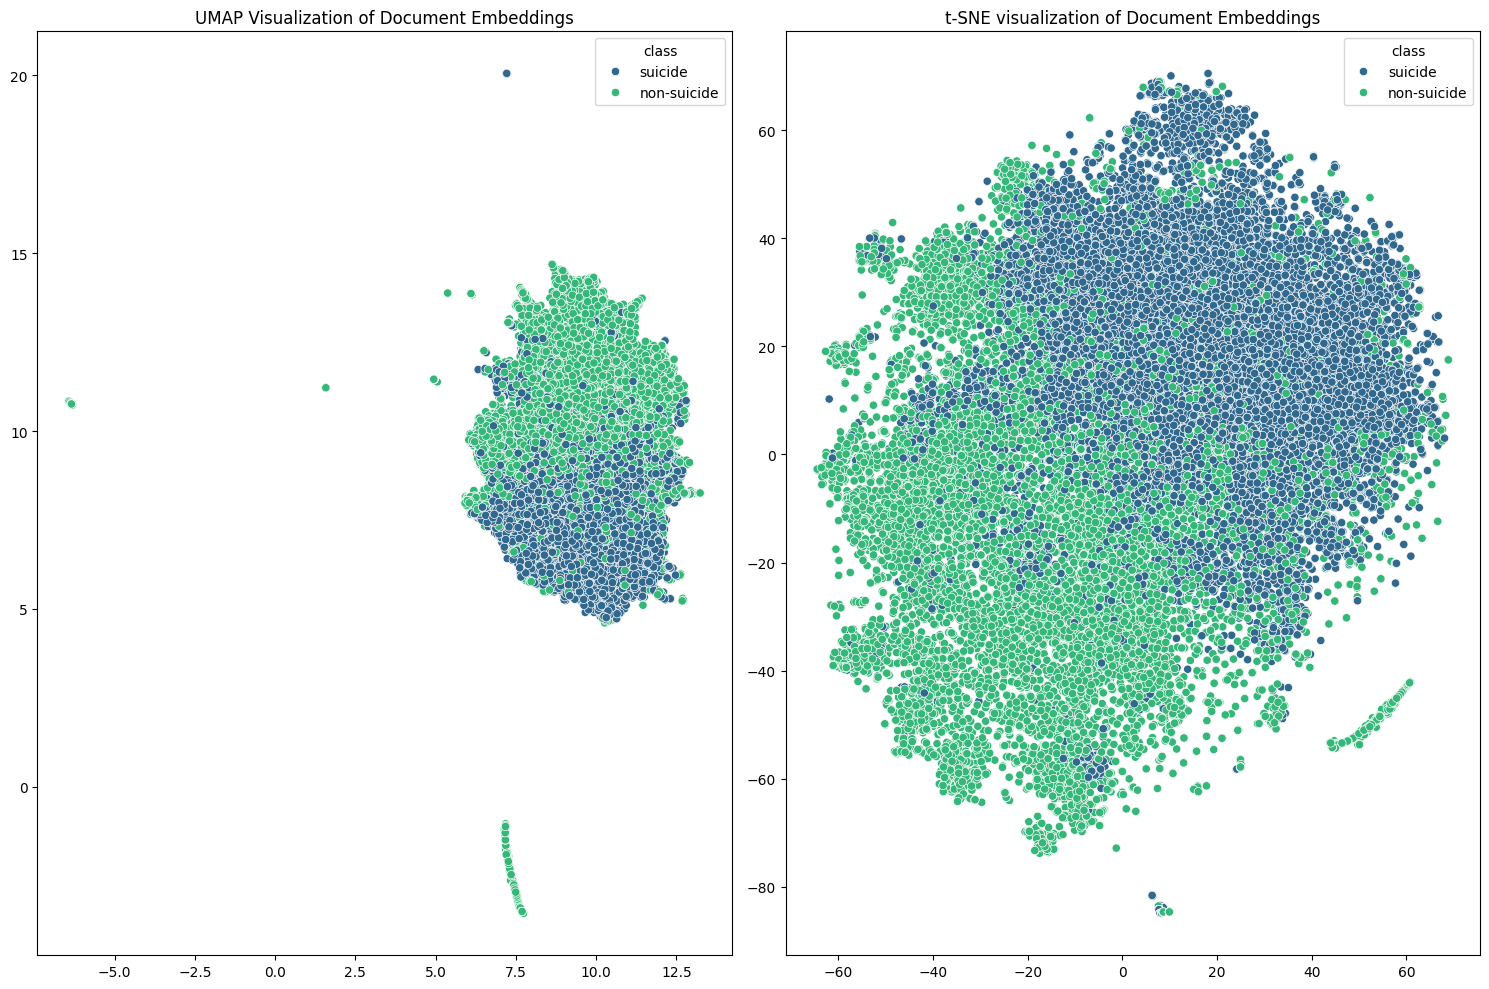

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
!pip install umap-learn
import umap
import matplotlib.pyplot as plt

# Preparar datos para t-SNE
X = np.array(list(train_data['word2vec_vector']))
y = train_data['class']

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# Aplicar UMAP
reducer = umap.UMAP(random_state=42)
X_reduced_umap = reducer.fit_transform(X)

# Visualización de UMAP y tSNE
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_reduced_umap[:, 0], y=X_reduced_umap[:, 1], hue=y, palette='viridis')
plt.title('UMAP Visualization of Document Embeddings')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='viridis')
plt.title('t-SNE visualization of Document Embeddings')

plt.tight_layout()
plt.show()

## Modelos de redes neuronales para NLP

### Modelo RNN simple

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

# Separación de dataset en training y testing
train_data ,test_data = train_test_split(pre_processed,test_size=0.2,random_state=42)

# Preparación de datos
tokenizer= Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(train_data['cleaned_text'])
X_train = pad_sequences(sequences, maxlen=100)
y_train = np.array([1 if label == 'suicide' else 0 for label in train_data['class'].values])


# Construcción del modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(5000, 64))
model_rnn.add(SimpleRNN(50))
model_rnn.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model_rnn.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

# Entrenamiento del modelo
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Evaluación del modelo
sequences_test_rnn = tokenizer.texts_to_sequences(test_data['cleaned_text'])
X_test_rnn = pad_sequences(sequences_test_rnn, maxlen=100)
y_test_rnn = np.array([1 if label == 'suicide' else 0 for label in test_data['class'].values])

# Realizar predicciones
y_pred_rnn = (model_rnn.predict(X_test_rnn) > 0.5).astype("int32")

# Calcular métricas
accuracy_rnn = accuracy_score(y_test_rnn, y_pred_rnn)
precision_rnn, recall_rnn, f1_rnn, _ = precision_recall_fscore_support(y_test_rnn, y_pred_rnn, average='binary')
cm_rnn = confusion_matrix(y_test_rnn, y_pred_rnn,labels=[0, 1])

print("Accuracy:", accuracy_rnn)
print("Precision:", precision_rnn)
print("Recall:", recall_rnn)
print("F1-score:", f1_rnn)
print("Confusion Matrix:\n", cm_rnn)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.8065 - loss: 0.4407
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.9050 - loss: 0.2654
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.9177 - loss: 0.2363
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9230 - loss: 0.2222
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9300 - loss: 0.2013
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.9031666666666667
Precision: 0.9184459222961148
Recall: 0.882907133243607
F1-score: 0.9003259564247726
Confusion Matrix:
 [[2795  233]
 [ 348 2624]]


### Modelo LSTM

In [ ]:
from keras.layers import Dropout, Bidirectional
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Separación de dataset en training y testing
train_data ,test_data = train_test_split(pre_processed,test_size=0.2,random_state=42)

# Preparación de datos

tokenizer= Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(train_data['cleaned_text'])
X_train = pad_sequences(sequences, maxlen=100)
y_train = np.array([1 if label == 'suicide' else 0 for label in train_data['class'].values])

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(5000,64))
model_lstm.add(Bidirectional(LSTM(50, return_sequences=True)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Bidirectional(LSTM(50)))
model_lstm.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))


# Compilar el modelo
# model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
model_lstm.summary()

# Entrenamiento del modelo
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64)
#model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluación LSTM
# Preparar datos de prueba
sequences_test = tokenizer.texts_to_sequences(test_data['cleaned_text'])
X_test = pad_sequences(sequences_test, maxlen=100)
y_test = np.array([1 if label == 'suicide' else 0 for label in test_data['class'].values])

# Realizar predicciones
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")

# Calcular métricas
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm, recall_lstm, f1_lstm, _ = precision_recall_fscore_support(y_test, y_pred_lstm, average='binary')
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

print("Accuracy:", accuracy_lstm)
print("Precision:", precision_lstm)
print("Recall:", recall_lstm)
print("F1-score:", f1_lstm)
print("Confusion Matrix:\n", cm_lstm)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.8059 - loss: 0.4515
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9046 - loss: 0.2682
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.9145 - loss: 0.2314
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9247 - loss: 0.2109
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9320 - loss: 0.1981
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Accuracy: 0.9126666666666666
Precision: 0.9180327868852459
Recall: 0.9044414535666218
F1-score: 0.9111864406779661
Confusion Matrix:
 [[2788  240]
 [ 284 2688]]


## Modelo BERT

In [ ]:
!pip install transformers torch evaluate
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.preprocessing import LabelEncoder
import evaluate
from datasets import load_dataset


# Cargar el tokenizador y el modelo DistilBERT para clasificación
tokenizer_bert = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', clean_up_tokenization_spaces=True)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Crear un encoder para las etiquetas
label_encoder = LabelEncoder()

# Ajustar el encoder a las etiquetas y transformar
train_data['class'] = label_encoder.fit_transform(train_data['class'])
test_data['class'] = label_encoder.transform(test_data['class'])

# Convertir las etiquetas a tensores
train_labels = torch.tensor(train_data['class'].values)
test_labels = torch.tensor(test_data['class'].values)

def encode_data(text, tokenizer):
    return tokenizer.batch_encode_plus(
        text,
        add_special_tokens=True,
        max_length=100,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

# Tokenizar los conjuntos de entrenamiento y prueba
train_encodings = encode_data(train_data['cleaned_text'], tokenizer_bert)
test_encodings = encode_data(test_data['cleaned_text'], tokenizer_bert)

# Crear un Dataset personalizado para el Trainer
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

# Configurar argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',          # Directorio de salida
    num_train_epochs=5,              # Número de épocas
    per_device_train_batch_size=8,   # Tamaño del batch
    gradient_accumulation_steps=8,   # Acumulación de gradientes
    fp16=True,                       # Usar precisión mixta (float16)
    logging_dir='./logs',            # Directorio de logs
    logging_steps=10,
)

# Define the compute_metrics function
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = evaluate.load("f1")
  return f1.compute(predictions=preds, references=labels)

# Entrenador
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    compute_metrics=compute_metrics
)


# Entrenar el modelo
trainer.train()

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
10,0.591400
20,0.425800
30,0.329900
40,0.339600
50,0.300200
60,0.295800
70,0.306300
80,0.260700
90,0.231900
100,0.292100


TrainOutput(global_step=1875, training_loss=0.12767057317097982, metrics={'train_runtime': 507.7979, 'train_samples_per_second': 236.315, 'train_steps_per_second': 3.692, 'total_flos': 3104704656000000.0, 'train_loss': 0.12767057317097982, 'epoch': 5.0})

Evaluación modelo Bert

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the model
trainer.evaluate(eval_dataset=test_dataset)
predictions = trainer.predict(CustomDataset(test_encodings, test_labels))

# Obtener las etiquetas predichas
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Calcular métricas
accuracy_bert = accuracy_score(test_labels, predicted_labels)
precision_bert = precision_score(test_labels, predicted_labels, average='weighted')
recall_bert = recall_score(test_labels, predicted_labels, average='weighted')
f1_bert = f1_score(test_labels, predicted_labels, average='weighted')
cm_bert = confusion_matrix(test_labels, predicted_labels)

# Imprimir los resultados
print(f"Accuracy: {accuracy_bert}")
print(f"Precision: {precision_bert}")
print(f"Recall: {recall_bert}")
print(f"F1-score: {f1_bert}")
print(f"Confusion Matrix:\n{cm_bert}")


Accuracy: 0.9191666666666667
Precision: 0.9191787047139311
Recall: 0.9191666666666667
F1-score: 0.919163466513865
Confusion Matrix:
[[2795  233]
 [ 252 2720]]


# COMPARATIVA DE TODOS LOS MODELOS

In [ ]:
data = {
    'Model': ['Logistic Regression (BoW)', 'Logistic Regression (TF-IDF)', 'Logistic Regression (GloVe)', 'Logistic Regression (Word2Vec)', 'RNN', 'LSTM', 'BERT'],
    'Accuracy': [accuracy_bow, accuracy_tfidf, accuracy_GloVe, accuracy_word2Vec, accuracy_rnn, accuracy_lstm, accuracy_bert],
    'Precision': [precision_bow, precision_tfidf, precision_GloVe, precision_word2Vec, precision_rnn, precision_lstm, precision_bert],
    'Recall': [recall_bow, recall_tfidf, recall_GloVe, recall_word2Vec, recall_rnn, recall_lstm, recall_bert],
    'F1-Score': [f1_bow, f1_tfidf, f1_GloVe, f1_word2Vec, f1_rnn, f1_lstm, f1_bert]
}

df = pd.DataFrame(data)
print(df)

                            Model  Accuracy  Precision    Recall  F1-Score
0       Logistic Regression (BoW)  0.900167   0.900897  0.900167  0.900102
1    Logistic Regression (TF-IDF)  0.912000   0.912247  0.912000  0.911977
2     Logistic Regression (GloVe)  0.799667   0.802727  0.799667  0.799264
3  Logistic Regression (Word2Vec)  0.883667   0.885171  0.883667  0.883586
4                             RNN  0.903167   0.918446  0.882907  0.900326
5                            LSTM  0.912667   0.918033  0.904441  0.911186
6                            BERT  0.919167   0.919179  0.919167  0.919163
